In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib
import numpy as np
from pathlib import Path
import os
import pickle
import matplotlib.pyplot as plt
logs = Path('logs/')

In [2]:
def plot_histories(histories, label, cutoff, filtering=0.89):
    def plot_cutoff(metric):
        plt.plot(np.arange(cutoff, cutoff+len(metric[cutoff:])), metric[cutoff:], label=label)
        
    train, train_ext, loss, acc = histories
    loss = train['val_loss'] + train_ext['val_loss']    
    acc = train['val_acc'] + train_ext['val_acc']

    for i, x in enumerate([loss, acc]):
        plt.figure(2*i)
        plt.plot(x, label=label)
        plt.figure(2*i+1)
        plot_cutoff(x)

MobileNetFConnected, $\alpha=0.75$, factor = 767 & 0.911 & 0.441
MobileNetFConnected, $\alpha=1.0$, factor = 950 & 0.911 & 0.472
MobileNet, $\alpha=0.75$, factor = 443 & 0.911 & 0.482
MobileNetFConnected, $\alpha=0.75$, factor = 605 & 0.911 & 0.427
MobileNetFConnected, $\alpha=0.75$, factor = 398 & 0.913 & 0.409



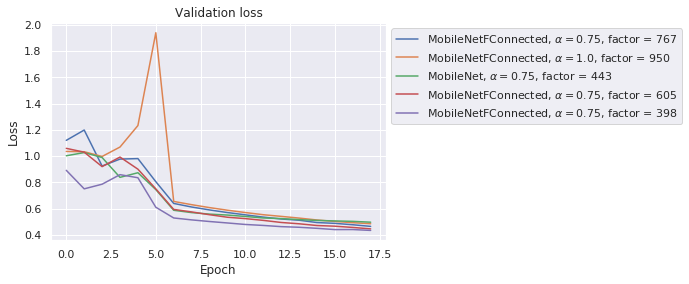

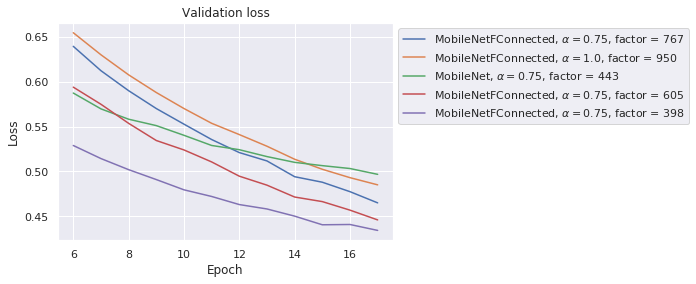

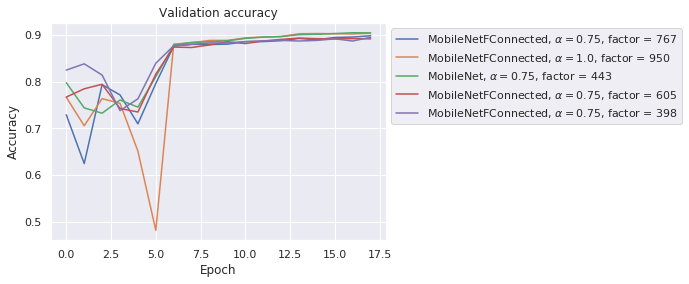

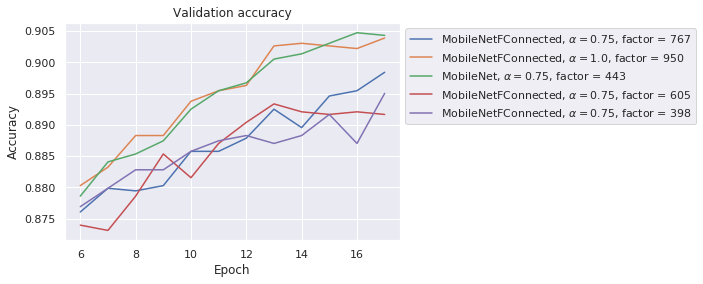

In [4]:
class ModelPlot:
    
    def __init__(self, glob, extractor, cutoff):
        self.glob = glob
        self.extractor = extractor
        self.cutoff = cutoff
        
mps = [ModelPlot('MobileNet*/histories', lambda x : f'{x[0]}, $\\alpha={x[2]}$, factor = {x[3]}', 6),
       ModelPlot('Inception*/histories', lambda x : f'{x[0]}, factor = {x[1]}', 25),
       ModelPlot('VGG16*/histories', lambda x : f'{x[0]}, factor = {x[1]}', 10),
       ModelPlot('adience_VGG16*/histories', lambda x : f'{x[1]}, factor = {x[2]}', 6),
       ModelPlot('adience_MobileNet*/histories', lambda x : f'{x[1]}, $\\alpha={x[3]}$, factor = {x[4]}', 6),
       ModelPlot('adience_Inception*/histories', lambda x : f'{x[1]}, factor = {x[2]}', 25),
       ModelPlot('transfer*/histories', lambda x : f'{x[0]}, factor = {x[1]}', 25),]

sns.set() 
        
def PlotMP(mp):
    
    consider = []
    for i, x in enumerate(logs.glob(mp.glob)):
        path, file = os.path.split(x)
        _, info = os.path.split(path)
        items = info.split('_')
        histories = pickle.load(open(x, 'rb'))
        consider.append((histories[-1], items, histories))
   
    consider = sorted(consider)
    
    s = ''
    for acc, items, histories in consider[-5:]:
        s += mp.extractor(items) + f' & {round(acc,3)} & {round(histories[-2],3)}\n'
        plot_histories(histories, mp.extractor(items), mp.cutoff)
    with open("table.txt", "w") as output:
        output.write(s)
    print(s)
    titles = ['Validation loss', 'Validation loss', 'Validation accuracy', 'Validation accuracy']
    for i in range(4):
        plt.figure(i)
        if i < 2:
            plt.ylabel('Loss')
        else:
            plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.title(titles[i])
        savename = titles[i].replace(' ', '')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.savefig(f'{savename}{i}.png', bbox_inches='tight')
        



PlotMP(mps[0])

VGG16, factor = 867 & 0.928 & 0.252
VGG16, factor = 957 & 0.933 & 0.226
VGG16, factor = 302 & 0.935 & 0.221
VGG16, factor = 543 & 0.937 & 0.243
VGG16, factor = 585 & 0.944 & 0.204



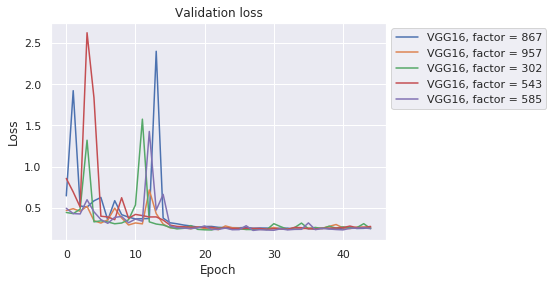

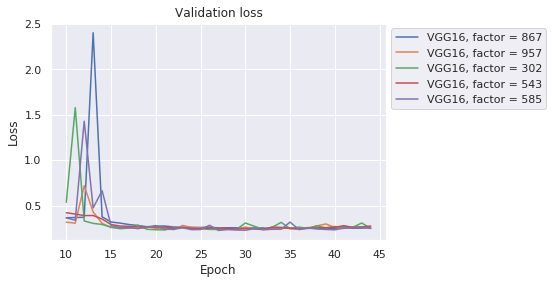

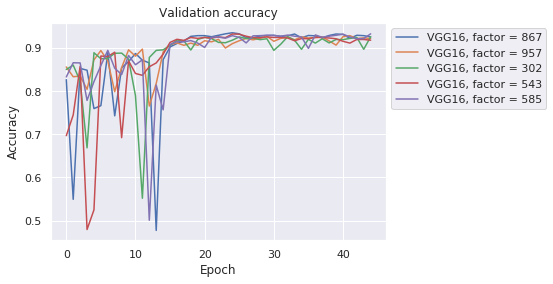

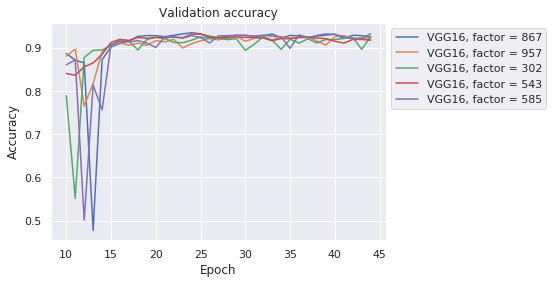

In [5]:
PlotMP(mps[2])

VGG16, factor = 761 & 0.902 & 0.363
VGG16, factor = 986 & 0.904 & 0.343
VGG16, factor = 396 & 0.909 & 0.345
VGG16, factor = 990 & 0.912 & 0.341
VGG16, factor = 561 & 0.949 & 0.301



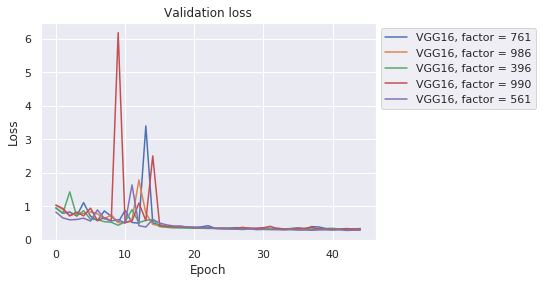

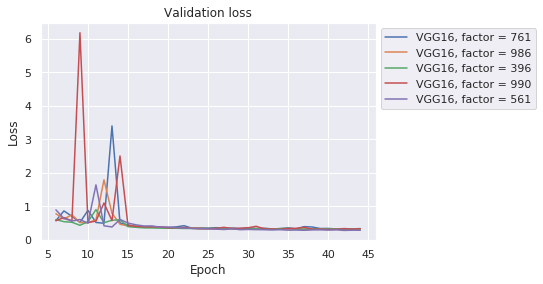

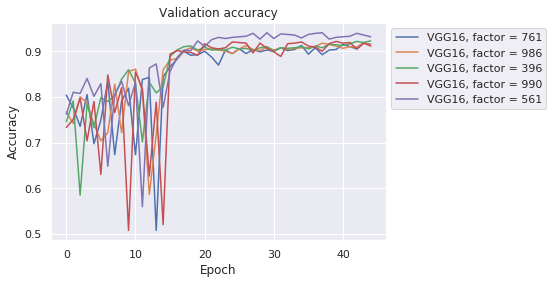

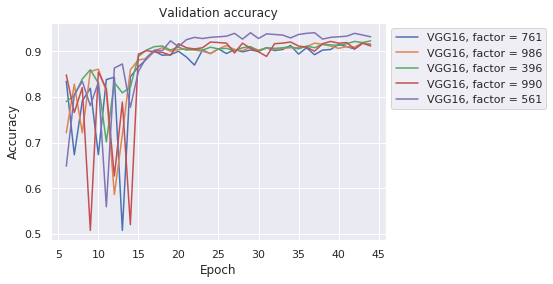

In [6]:
PlotMP(mps[3])